<a href="https://colab.research.google.com/github/Sarvesh421/Img_Classification-_CNN/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index][0]])

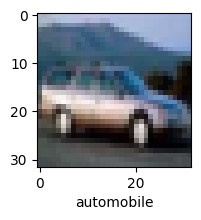

In [ ]:
plot_sample(X_train,y_train,4)

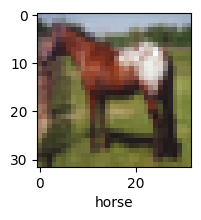

In [ ]:
plot_sample(X_train,y_train,1900)

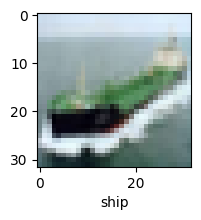

In [ ]:
plot_sample(X_train,y_train,190)


In [ ]:
X_train =X_train/255.0
X_test = X_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.2943 - loss: 1.9596
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.4155 - loss: 1.6696
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 70ms/step - accuracy: 0.4451 - loss: 1.5798
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.4673 - loss: 1.5229
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 75ms/step - accuracy: 0.4845 - loss: 1.4788


In [ ]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4549 - loss: 1.5413


[1.5460301637649536, 0.4498000144958496]

In [ ]:
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          30,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,249,012 (35.28 MB)

 Trainable params: 9,249,010 (35.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.60      0.54      1000
           1       0.69      0.43      0.53      1000
           2       0.31      0.41      0.36      1000
           3       0.41      0.15      0.22      1000
           4       0.56      0.15      0.24      1000
           5       0.43      0.32      0.36      1000
           6       0.31      0.85      0.45      1000
           7       0.55      0.51      0.53      1000
           8       0.66      0.53      0.59      1000
           9       0.57      0.54      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [ ]:
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7421 - loss: 0.7451
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7478 - loss: 0.7299
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7560 - loss: 0.6984
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7640 - loss: 0.6678
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7757 - loss: 0.6430
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7831 - loss: 0.6255
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7877 - loss: 0.6101
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7947 - loss: 0.5926
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7987 - loss: 0.5738
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8157 - loss: 0.5370
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8153 - loss: 0.5236
Epoch 12

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6322 - loss: 1.3589


[1.4081412553787231, 0.6280999779701233]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [ ]:

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

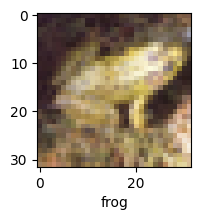

In [ ]:
 plot_sample(X_test , y_test,19)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[6.0509288e-01, 4.2725336e-05, 7.9716358e-04, 8.6050189e-01,
        2.9684015e-04, 3.2513300e-01, 6.0051465e-01, 1.5060804e-04,
        2.6087761e-03, 6.2858139e-06],
       [9.9489748e-01, 9.9749374e-01, 8.6212705e-04, 6.2289796e-06,
        1.2849806e-08, 7.5726959e-08, 3.8238004e-09, 9.7740531e-12,
        9.9995756e-01, 1.6331779e-03],
       [9.4927132e-01, 1.0502594e-01, 7.9274014e-02, 1.4620435e-02,
        1.4765715e-04, 4.7715422e-04, 3.6325580e-06, 3.2607248e-04,
        8.1572932e-01, 5.4865102e-03],
       [9.4996846e-01, 2.7850809e-02, 7.2338492e-01, 1.2587709e-02,
        4.2517275e-01, 3.6746020e-05, 9.2454767e-03, 1.0356514e-05,
        5.9108162e-01, 4.9625203e-04],
       [1.7987000e-05, 4.3323399e-03, 1.9014485e-01, 8.3401769e-01,
        9.9880272e-01, 5.4216381e-02, 9.9921638e-01, 8.8051806e-04,
        1.5164056e-06, 4.5075663e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[np.int64(3), np.int64(8), np.int64(0), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

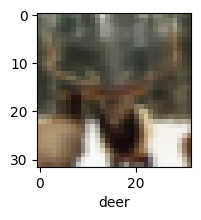

In [ ]:
plot_sample(X_test , y_test,19)

In [ ]:
classes[y_classes[19]]

'frog'

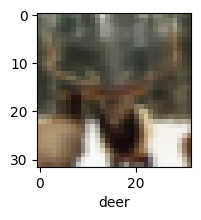

In [ ]:
plot_sample(X_test , y_test,26)


In [ ]:
classes[y_classes[26]]

'horse'

In [ ]:
print("Classification Report: \n" , classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      1000
           1       0.75      0.73      0.74      1000
           2       0.51      0.47      0.49      1000
           3       0.48      0.41      0.44      1000
           4       0.57      0.55      0.56      1000
           5       0.53      0.50      0.51      1000
           6       0.64      0.75      0.69      1000
           7       0.62      0.75      0.68      1000
           8       0.82      0.70      0.76      1000
           9       0.73      0.72      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

